# Appendix D Simulation 


Simulation is one crucial tool for modern statisticians that is often underutilized for beginners. With personal computing devices, we can easily simulate data to explore possible scenarios and verify our hypotheses. When learning statistics, it is wise to write simulations to understand new statistical procedures or concepts. 

As a programming language created for statistics analysis, `R` makes simulation easy and straight-forward. We will visit basics of simulations in this chapter. 

## D.1 Random number generation 

The building block of simulation is *random number generation*. Wikipedia describes that "RNG is a process which, through a device, generates a sequence of numbers or symbols that cannot be reasonably predicted better than by a random chance" ([link](https://en.wikipedia.org/wiki/Random_number_generation)). 

In practice, however, "true" randomness is infeasible and unnecessary for most tasks. Instead, most programming languages employ *pseudorandom number generation*. Briefly, a pseudorandom number generator draw  numbers following *deterministic* algorithms that approximate a truly random sequence. For instance, we can draw pseudorandom integers from 0 to 9 by reporting the digits of $\pi$ --- an irrational number whose decimal expansion never repeats or terminates. More about pseudorandom number generator can be found, e.g., [here](https://en.wikipedia.org/wiki/Pseudorandom_number_generator). 

In `R`, we almost always mean pseudorandom number generation when we say to draw a random variable. Since pseudorandom number generation use deterministic algorithms, we should expect an identical sequence if we assign identical initial conditions for the pseudorandom number generator (*randomseed*). Indeed, the identity provides the base for reproducibility of simulations.  


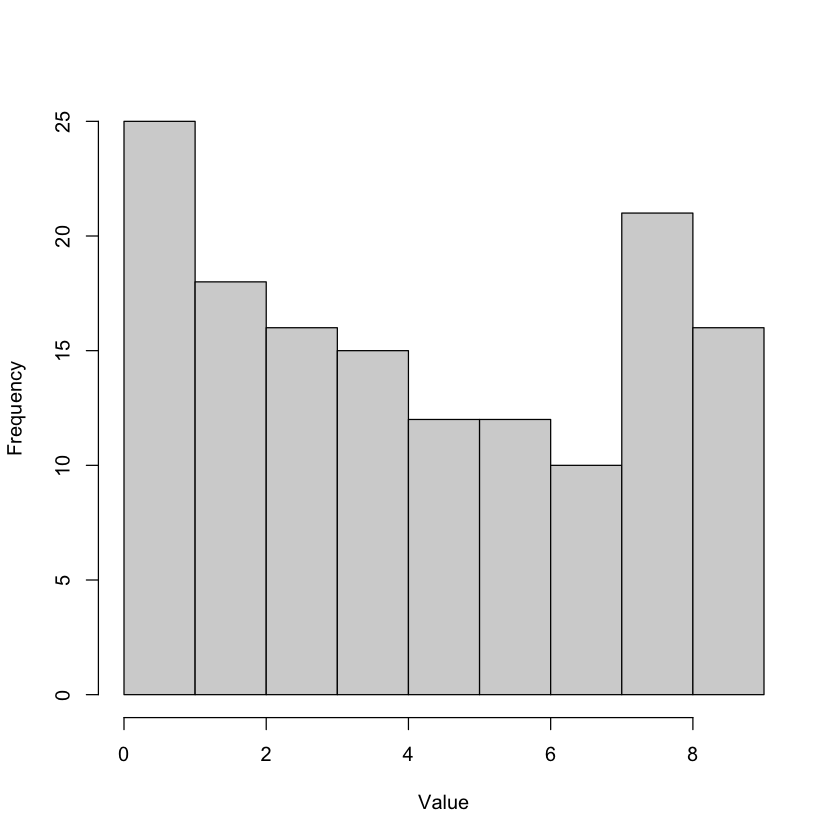

In [1]:
# Pseudorandom number generator based on pi:
# From http://www.geom.uiuc.edu/~huberty/math5337/groupe/digits.html
# Take the digits after the decimal point
pi_more = c("3589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481")
hist(as.numeric(unlist(strsplit(pi_more,""))),xlab="Value",main=" ")

We can write a function to draw a sequence of random integers (0 to 9) using the digits of $\pi$. This function takes two arguments, `n` for the number of variables and `seed` to determine which digit to start with. 

In [70]:
(100*proc.time()[3])%%100

elapsed 
   13.3

In [2]:
rpi<- function(n,seed=NULL){
    pi_more = c("141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481")
    pi_digits=as.numeric(unlist(strsplit(pi_more,"")));
    if (is.null(seed)){
     seed=   (100*(proc.time()[3]))%%100;
    }
    return(pi_digits[seed+(1:n)])
}


In [11]:
rpi(2)
rpi(2,seed=9)

[1] 7 9

## D.2 Simulating random variables in `R`

The `rpi` function is limited by manually-entered $\pi$ of 153 digits. Fortunately, `R` has a set of (pseudo)random number generators that are free of this limitation. 

### D.2.1 Uniform distribution 

The `runif` function in `R` draw, by default, uniform random variables in $[0,1]$. We can draw from uniform distributions in other intervals by changing its arguments. Furthermore, we can generate a wide range of random variables based on the uniform distribution using the [probability integral transform](https://en.wikipedia.org/wiki/Probability_integral_transform).

In [12]:
### Draw ten uniform random variables:
runif(10)
# use ?runif to see what other options are available 


[1] 0.79319577 0.47611435 0.86495042 0.88029388 0.11475525 0.02042258
 [7] 0.54815401 0.79163435 0.13091040 0.13799933

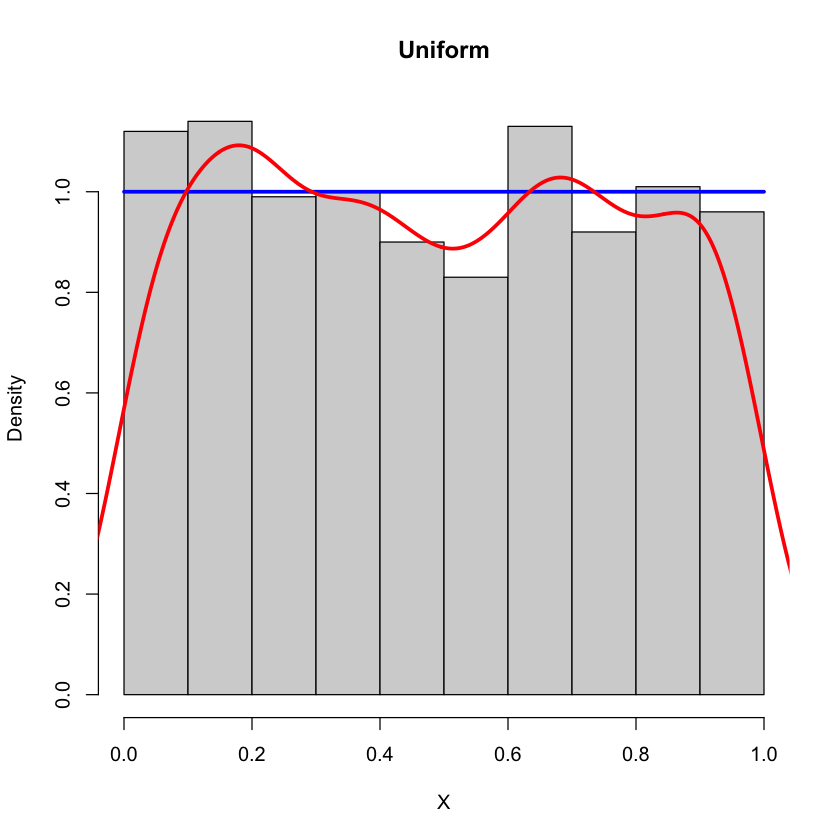

In [15]:

# To help understand this function, we can draw the density plot for this distribution
x.grid=seq(from=0,to=1,length.out=100)
unif.pdf=dunif(x.grid,min=0,max=1);

# Compare this with a histogram from a set of random variables from runif:
unif.rv.100=runif(1000);
hist(unif.rv.100,freq=FALSE,main='Uniform',xlab='X')
lines(y=unif.pdf,x=x.grid,col='blue',lwd=3)
# Further compare it with a smooth density estimation based on the samples:
unif.pdf.est=density(unif.rv.100);
lines(unif.pdf.est,col='red',lwd=3)

### D.2.2 Other distributions

In [18]:
### Normal
### Draw ten normal random variables with mean 0 and variance 2
rnorm(10,mean=2,sd=sqrt(2))

## Default: standard normal distribution (mean 0 var 1)

[1] -0.6938962  0.7555109 -0.3976066  2.5369059  0.7790291  1.6019039
 [7]  2.6859156  1.8821750  3.8170898  0.2194422

In [33]:
### Normal
### Draw ten normal random variables with mean 0 and variance 2
rnorm(10,mean=0,sd=sqrt(2))


### There are many other distributions in R
### try ?rchisq, ?rf, ?rt, ?rbeta, ?rpois, ...
## Other distributions
### Poisson  ?rpois

### Exponential ?rexp

### t ?rt


### Chisq ?rchisq


### F ?rf
## Sampling from a user-specified vector 



[1] -0.6528642  2.0255530 -0.9202236 -0.2932807 -0.5555143 -0.4525383
 [7] -0.3947258  0.6988878 -0.2507832 -0.7155319

[1] "new" "a"

In [32]:

### Draw samples from any vectors using sample()
wrd = c("yet", "a","new","sentence")
#set.seed(1)
sample(wrd,size=4)
# use ?sample to see other options
#sample(wrd,size=10,replace=T)

# Bootstrap

[1] "new"      "yet"      "sentence" "sentence"

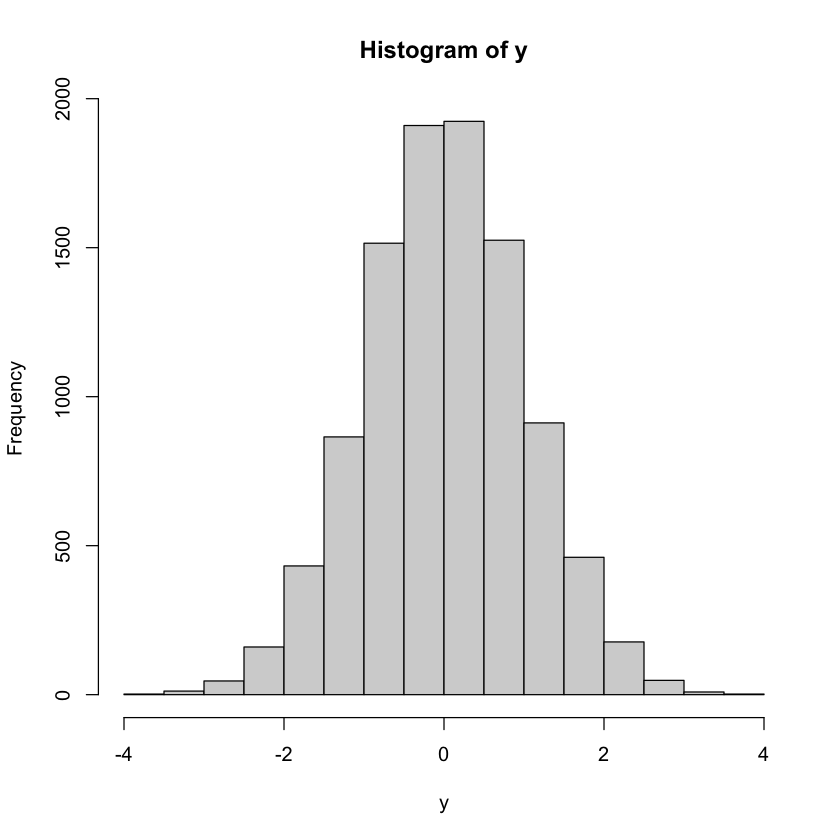

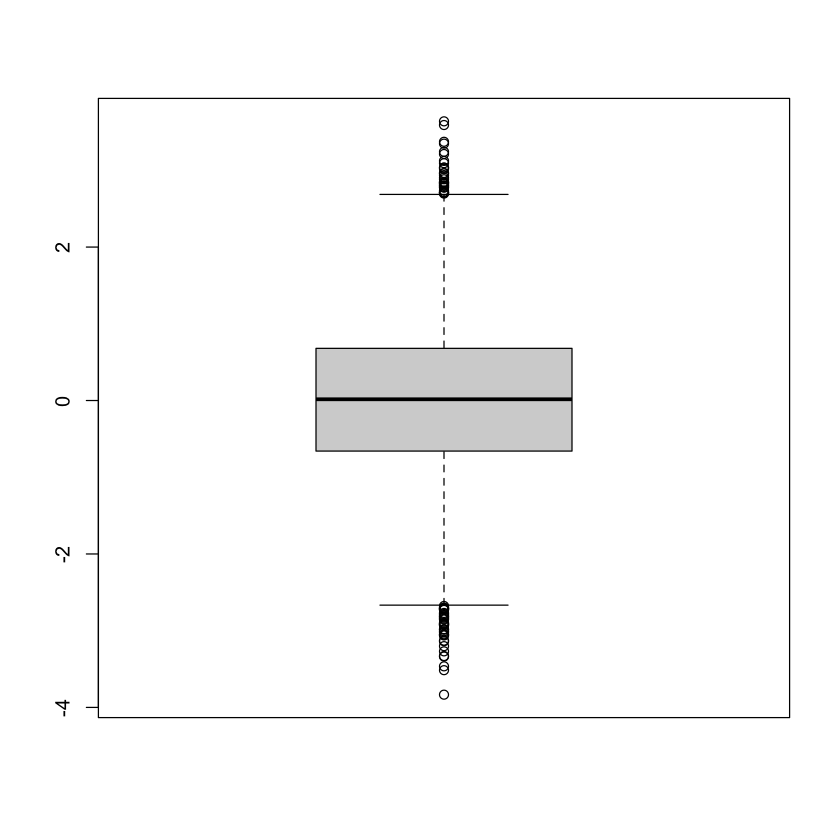

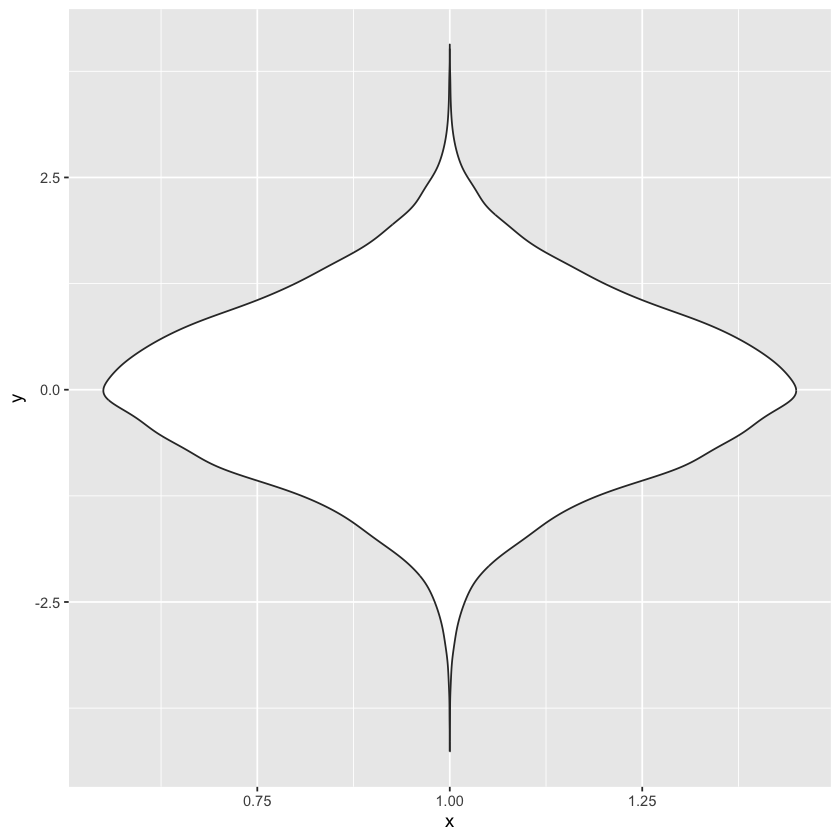

In [34]:
### Visulize the simulated data

y<-rnorm(10000);
# We start with the very basic histogram 
hist(y)
# Use ?hist to modify the plot 

# And the boxplot:
boxplot(y)

# We can also draw visualize the data using ggplot2
library(ggplot2)
dat=data.frame(y=y)
ggplot(dat, aes(x=1,y=y)) + 
  geom_violin(trim=FALSE)

## D.3 Examples: Coverage of confidence intervals 

One of the most confusing concepts for beginners in statistics is the confidence interval. The *correct* interpretation of a $100(1-\alpha)\%$ confidence interval is that: 
> the procedure to construct the confidence interval will produce confidence intervals that cover the true parameter $100(1-\alpha)\%$ of the times upon drawing a new set of samples from the same population. 

This is hard to comprehend for anyone who does not know the idea of sampling distribution. However, with simulation, we can verify this statement on our own.

We will simulate data from a linear regression model 
$$
y = x \beta_1+\beta_0 + \epsilon,
$$
where $\epsilon$ follows a uniform distribution in $[-2.5,2.5]$. The covariate $x$ will be drawn from a normal distribution with mean 10 and variance 4. 

In [35]:
set.seed(1)
n=50; # sample size = 50
x=as.matrix(rnorm(n,mean=10,sd=2),ncol=n); # generate the covariate 
beta.true=c(20,0.15)
Ey= x*beta.true[2]+beta.true[1]; # E[y] = x beta1 + beta0
error.terms= runif(n,min=0,max=1)*5-2.5;
# error.terms= runif(n,min=-2.5,max=2.5);
y=Ey+error.terms;

We can use `lm()` and `confint()` in `R` to fit a linear regression and obtain the confidence intervals for $\beta_1$ and $\beta_0$. 

In [36]:
# For a given confidence level alpha, construct a 100(1-alpha)% confidence interval 
alpha=0.05;
fit.lm=lm(y~x+1);
(CIs<-confint(fit.lm,level=1-alpha))


,2.5 %,97.5 %
(Intercept),15.2398809,20.0540227
x,0.1477053,0.6136117


In the previous code, we (i) simulate data from a linear regression model and (ii) construct the confidence intervals for the unknown $\beta$s. We have thus simulated one instance from the scenario in consideration. We shall wrap up the code into a function, and use `replicate()` in `R` to simulate many more instances. 

In [37]:
# Wrapping up the function
simulate.one.instance<-function(x,beta.true,alpha){
  # set.seed(1)
  n=length(x); # getting sample size from the covariate x 
    
  Ey= x*beta.true[2]+beta.true[1];
  error.terms= runif(n)*5-2.5;
  y=Ey+error.terms;
  fit.lm=lm(y~x+1);
  CIs<-confint(fit.lm,level=1-alpha)
    
  return(CIs)
}


In [38]:
# Specify parameters
N.sim=1e4;
set.seed(1)
n=50;
x=as.matrix(rnorm(n,mean=10,sd=2),ncol=n);
beta.true=c(20,0.15)

In [45]:
# Run simulation
alpha=0.0001;
sim.CIs=replicate(N.sim,
                  simulate.one.instance(x,beta.true,alpha));

In [46]:
dim(sim.CIs)
sim.CIs[,,1]

[1]     2     2 10000

,0.005 %,99.995 %
(Intercept),13.3447409,24.556942
x,-0.2919242,0.793178


Now to visualize the simulation results.

[1] 0.9999

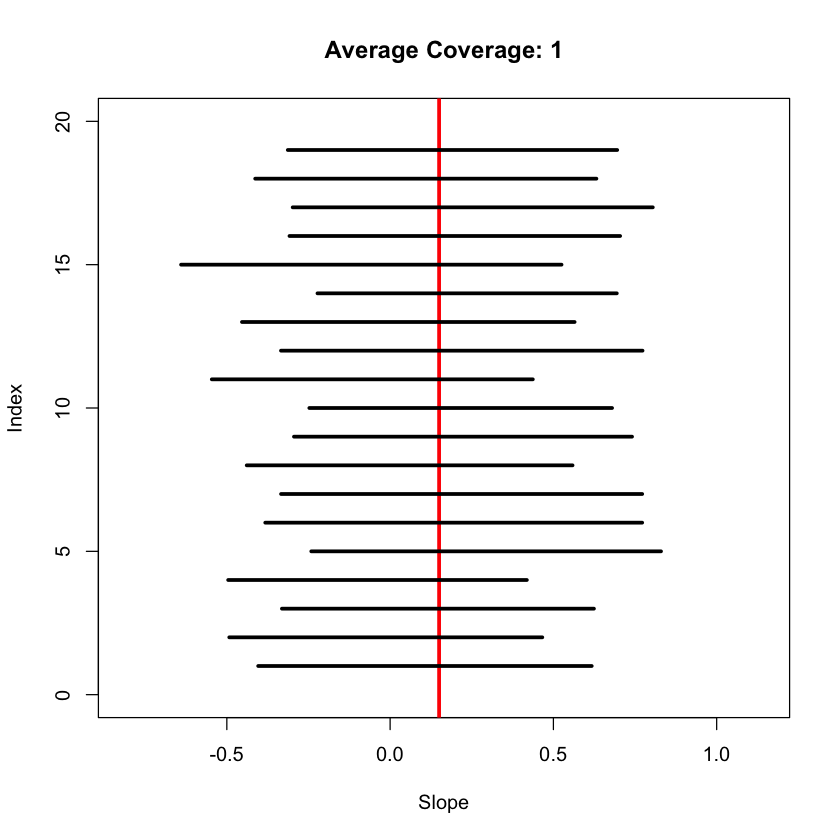

In [47]:
# Visualize result
coverage=sum(sim.CIs[2,1,]<beta.true[2] & sim.CIs[2,2,]>beta.true[2])/N.sim;
a=100
1-alpha
plot(0,0,col="white",xlim=c(min(sim.CIs[2,1,]),max(sim.CIs[2,2,])),ylim=c(0,20),xlab="Slope",ylab="Index",main=paste('Average Coverage:', signif(coverage,3)))
abline(v=beta.true[2],lwd=3,col='red')
for(i in a+(1:19)){
  segments(sim.CIs[2,1,i],i-a,sim.CIs[2,2,i],i-a,lwd=3)
}